In [1]:
#安裝套件
!pip install tensorflow

In [2]:
# # 使用gpu
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# device_name = tf.test.gpu_device_name()
# # if device_name != '/device:GPU:0':
# #   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [3]:
# 掛載雲端硬碟
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
# 檢視雲端硬碟資料
!ls "/content/drive/My Drive/Colab Notebooks/EarlyWarningStocksGAN/EWSGAN/"

companylist.csv  index_train  punish.csv   stock_data	       X_scaler  X_train  YC_train  Y_test
index_test	 models       punish.xlsx  stock_data_Fourier  X_test	 YC_test  Y_scaler  Y_train


In [5]:
import os
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras.layers import LSTM
from keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

In [9]:
#global variable
get_last_days = 182 #30
googlepath = "drive/MyDrive/Colab Notebooks/EarlyWarningStocksGAN/EWSGAN"

In [7]:
def LoadDataToList(filespath):
  data_list = []
  for file_name in os.listdir(filespath):
    file_path = os.path.join(filespath, file_name)
    loaded_data = np.load(file_path, allow_pickle=True)
    # print(f"{file_name} shape: {loaded_data.shape}")
    for data in loaded_data:
        data_list.insert(0,data)
  print(data_list)
  return np.array(data_list)

In [11]:
# Load data
X_train = LoadDataToList(f'{googlepath}/X_train')
y_train = LoadDataToList(f'{googlepath}/Y_train')
X_test = LoadDataToList(f'{googlepath}/X_test')
y_test = LoadDataToList(f'{googlepath}/Y_test')
yc_train = LoadDataToList(f'{googlepath}/YC_train')
yc_test = LoadDataToList(f'{googlepath}/YC_test')

X_train1236_1101119_Fourier.npy shape: (124, 5, 25)
X_train1307_1090506_Fourier.npy shape: (124, 5, 25)
X_train1325_1090204_Fourier.npy shape: (124, 5, 25)
X_train1342_1111208_Fourier.npy shape: (124, 5, 25)
X_train1414_1091110_Fourier.npy shape: (124, 5, 25)
X_train1432_1090820_Fourier.npy shape: (124, 5, 25)
X_train1432_1110323_Fourier.npy shape: (124, 5, 25)
X_train1441_1100505_Fourier.npy shape: (124, 5, 25)
X_train1444_1090810_Fourier.npy shape: (124, 5, 25)
X_train1449_1110819_Fourier.npy shape: (124, 5, 25)
X_train1453_1110411_Fourier.npy shape: (124, 5, 25)
X_train1455_1100603_Fourier.npy shape: (124, 5, 25)
X_train1456_1091127_Fourier.npy shape: (124, 5, 25)
X_train1460_1090410_Fourier.npy shape: (124, 5, 25)
X_train1468_1090616_Fourier.npy shape: (124, 5, 25)
X_train1471_1100412_Fourier.npy shape: (124, 5, 25)
X_train1474_1090619_Fourier.npy shape: (124, 5, 25)
X_train1517_1100407_Fourier.npy shape: (124, 5, 25)
X_train1524_1110524_Fourier.npy shape: (124, 5, 25)
X_train1526_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



y_train1236_1101119_Fourier.npy shape: (124, 1)
y_train1307_1090506_Fourier.npy shape: (124, 1)
y_train1325_1090204_Fourier.npy shape: (124, 1)
y_train1342_1111208_Fourier.npy shape: (124, 1)
y_train1414_1091110_Fourier.npy shape: (124, 1)
y_train1432_1090820_Fourier.npy shape: (124, 1)
y_train1432_1110323_Fourier.npy shape: (124, 1)
y_train1441_1100505_Fourier.npy shape: (124, 1)
y_train1444_1090810_Fourier.npy shape: (124, 1)
y_train1449_1110819_Fourier.npy shape: (124, 1)
y_train1453_1110411_Fourier.npy shape: (124, 1)
y_train1455_1100603_Fourier.npy shape: (124, 1)
y_train1456_1091127_Fourier.npy shape: (124, 1)
y_train1460_1090410_Fourier.npy shape: (124, 1)
y_train1468_1090616_Fourier.npy shape: (124, 1)
y_train1471_1100412_Fourier.npy shape: (124, 1)
y_train1474_1090619_Fourier.npy shape: (124, 1)
y_train1517_1100407_Fourier.npy shape: (124, 1)
y_train1524_1110524_Fourier.npy shape: (124, 1)
y_train1526_1090526_Fourier.npy shape: (124, 1)
y_train1529_1110207_Fourier.npy shape: (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



串流輸出內容已截斷至最後 5000 行。
       [0.51381215],
       [0.51933702]]), array([[0.49171271],
       [0.49723757],
       [0.50276243],
       [0.50828729],
       [0.51381215]]), array([[0.48618785],
       [0.49171271],
       [0.49723757],
       [0.50276243],
       [0.50828729]]), array([[0.48066298],
       [0.48618785],
       [0.49171271],
       [0.49723757],
       [0.50276243]]), array([[0.47513812],
       [0.48066298],
       [0.48618785],
       [0.49171271],
       [0.49723757]]), array([[0.46961326],
       [0.47513812],
       [0.48066298],
       [0.48618785],
       [0.49171271]]), array([[0.4640884 ],
       [0.46961326],
       [0.47513812],
       [0.48066298],
       [0.48618785]]), array([[0.45856354],
       [0.4640884 ],
       [0.46961326],
       [0.47513812],
       [0.48066298]]), array([[0.45303867],
       [0.45856354],
       [0.4640884 ],
       [0.46961326],
       [0.47513812]]), array([[0.44751381],
       [0.45303867],
       [0.45856354],
       [0.464088

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

In [13]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [14]:
def basic_lstm(input_dim, feature_size):
  model = Sequential()
  model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
  model.add(Dense(64))
  model.add(Dense(units=output_dim))
  model.compile(optimizer=Adam(learning_rate = LR), loss='mse')
  history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                      verbose=2, shuffle=False)

  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='validation')
  pyplot.legend()
  pyplot.show()

  return model

Epoch 1/50
338/338 - 14s - loss: 0.0514 - val_loss: 0.2687 - 14s/epoch - 42ms/step
Epoch 2/50
338/338 - 9s - loss: 0.0346 - val_loss: 0.3059 - 9s/epoch - 26ms/step
Epoch 3/50
338/338 - 10s - loss: 0.0310 - val_loss: 0.2923 - 10s/epoch - 31ms/step
Epoch 4/50
338/338 - 8s - loss: 0.0284 - val_loss: 0.2784 - 8s/epoch - 23ms/step
Epoch 5/50
338/338 - 10s - loss: 0.0268 - val_loss: 0.2651 - 10s/epoch - 31ms/step
Epoch 6/50
338/338 - 7s - loss: 0.0257 - val_loss: 0.2530 - 7s/epoch - 21ms/step
Epoch 7/50
338/338 - 10s - loss: 0.0247 - val_loss: 0.2431 - 10s/epoch - 29ms/step
Epoch 8/50
338/338 - 8s - loss: 0.0238 - val_loss: 0.2367 - 8s/epoch - 25ms/step
Epoch 9/50
338/338 - 9s - loss: 0.0231 - val_loss: 0.2334 - 9s/epoch - 26ms/step
Epoch 10/50
338/338 - 10s - loss: 0.0224 - val_loss: 0.2294 - 10s/epoch - 29ms/step
Epoch 11/50
338/338 - 7s - loss: 0.0218 - val_loss: 0.2234 - 7s/epoch - 21ms/step
Epoch 12/50
338/338 - 10s - loss: 0.0212 - val_loss: 0.2194 - 10s/epoch - 29ms/step
Epoch 13/50
3

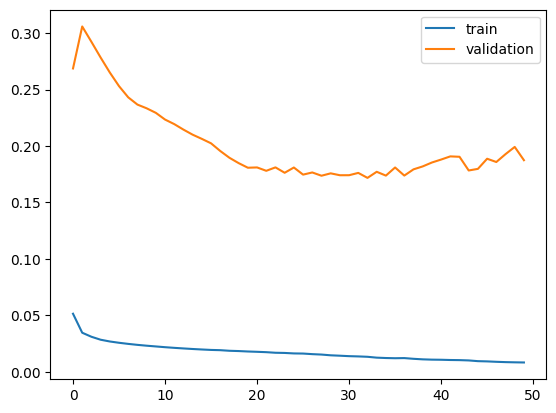

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               157696    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 174209 (680.50 KB)
Trainable params: 174209 (680.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
rmse:0.43290880415032695
rmspe:0.5055257648465109


In [15]:
model = basic_lstm(input_dim, feature_size)
model.save('LSTM.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(f'rmse:{rmse}')

rmspe = np.sqrt(mean_squared_error(y_test, yhat)) / np.mean(
            y_test)
print(f'rmspe:{rmspe}')